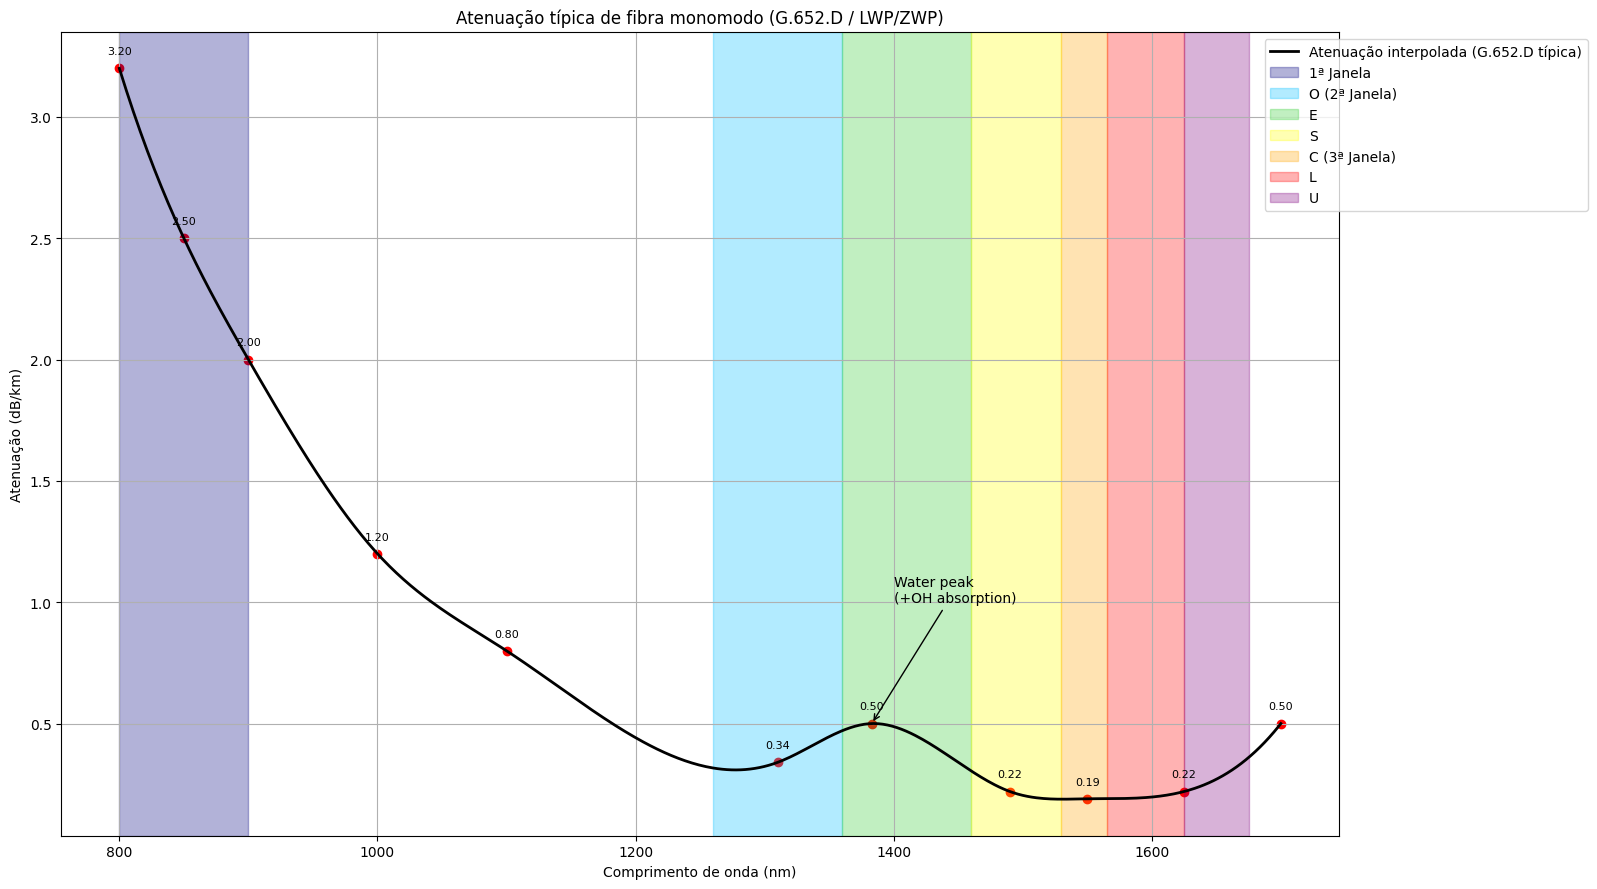

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Pontos (nm, dB/km)
x = np.array([800, 850, 900, 1000, 1100, 1310, 1383, 1490, 1550, 1625, 1700])
y = np.array([3.2,   2.5,  2.0,  1.2,   0.8,   0.34,   0.5,   0.22,  0.19,   0.22,  0.5])

# Interpolação suave
xs = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)
ys = spl(xs)

plt.figure(figsize=(16, 9))
plt.plot(xs, ys, 'k-', linewidth=2, label='Atenuação interpolada (G.652.D típica)')

# Marcar pontos originais
plt.scatter(x, y, c='red')
for xi, yi in zip(x, y):
    plt.text(xi, yi+0.05, f'{yi:.2f}', ha='center', va='bottom', fontsize=8)

# Janelas e bandas
plt.axvspan(800, 900, color='navy', alpha=0.3, label='1ª Janela')
plt.axvspan(1260, 1360, color='deepskyblue', alpha=0.3, label='O (2ª Janela)')
plt.axvspan(1360, 1460, color='limegreen', alpha=0.3, label='E')
plt.axvspan(1460, 1530, color='yellow', alpha=0.3, label='S')
plt.axvspan(1530, 1565, color='orange', alpha=0.3, label='C (3ª Janela)')
plt.axvspan(1565, 1625, color='red', alpha=0.3, label='L')
plt.axvspan(1625, 1675, color='purple', alpha=0.3, label='U')

# Anotação Water Peak
plt.annotate('Water peak\n(+OH absorption)',
             xy=(1383, 0.5), xytext=(1400, 1.0),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Comprimento de onda (nm)')
plt.ylabel('Atenuação (dB/km)')
plt.title('Atenuação típica de fibra monomodo (G.652.D / LWP/ZWP)')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
plt.show()


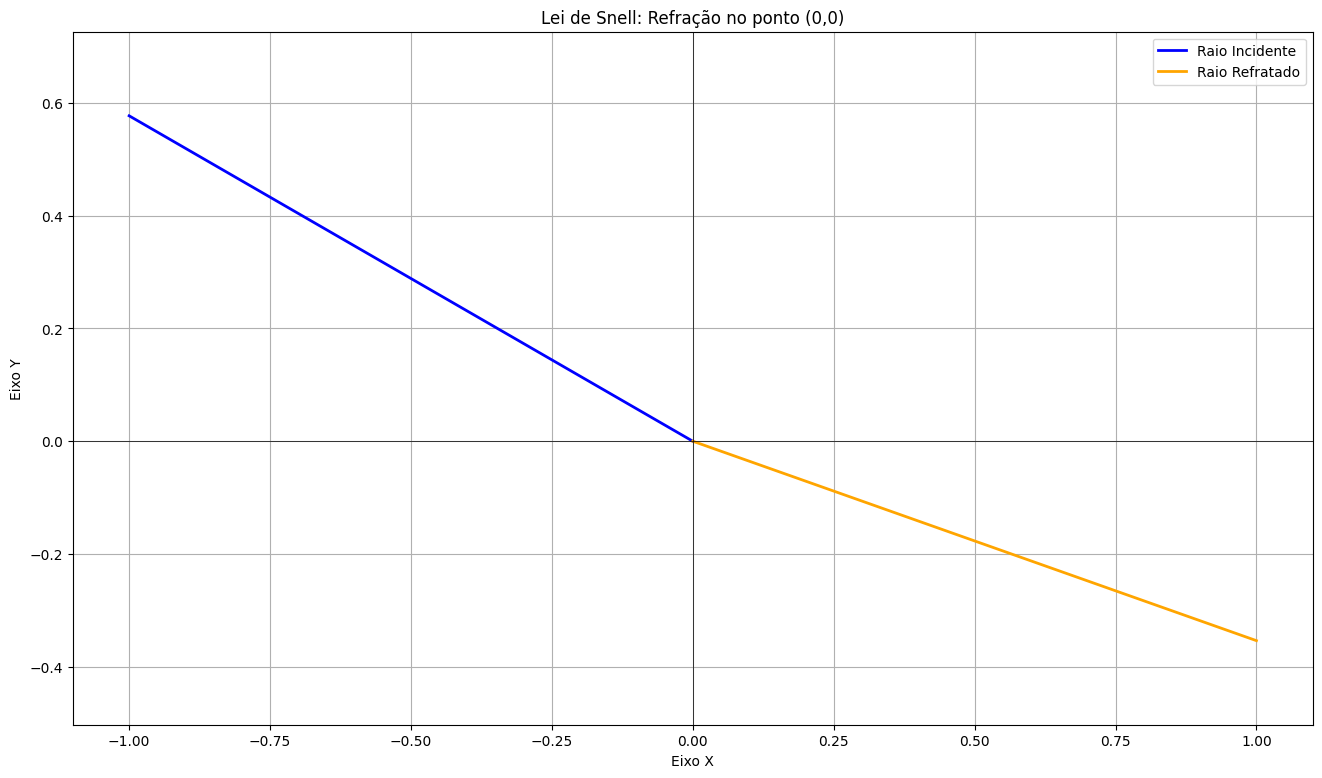

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
c_vacuo = 299792458  # m/s
c_fibra = 200000000  # m/s (exemplo típico para fibra óptica)
n = c_vacuo / c_fibra  # Índice de refração da fibra

# Função da Lei de Snell
def lei_de_snell(angulo_incidente):
    angulo_incidente_rad = np.radians(angulo_incidente)
    angulo_refracao_rad = np.arcsin(np.sin(angulo_incidente_rad) / n)
    return np.degrees(angulo_refracao_rad)

# Ângulo de incidência e cálculo do ângulo de refração
angulo_incidente = 30  # graus
angulo_refracao = lei_de_snell(angulo_incidente)

# Convertendo para radianos para uso com tangente
angulo_incidente_rad = np.radians(angulo_incidente)
angulo_refracao_rad = np.radians(angulo_refracao)

# Coordenadas dos pontos
comprimento = 1  # comprimento arbitrário do raio

# Raio incidente: vindo do segundo quadrante até (0, 0)
x_incidente = [-comprimento, 0]
y_incidente = [comprimento * np.tan(angulo_incidente_rad), 0]

# Raio refratado: saindo de (0, 0) para o quarto quadrante
x_refratado = [0, comprimento]
y_refratado = [0, -comprimento * np.tan(angulo_refracao_rad)]

# Plotagem
plt.figure(figsize=(16, 9))
plt.plot(x_incidente, y_incidente, label='Raio Incidente', color='blue', linewidth=2)
plt.plot(x_refratado, y_refratado, label='Raio Refratado', color='orange', linewidth=2)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('Lei de Snell: Refração no ponto (0,0)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


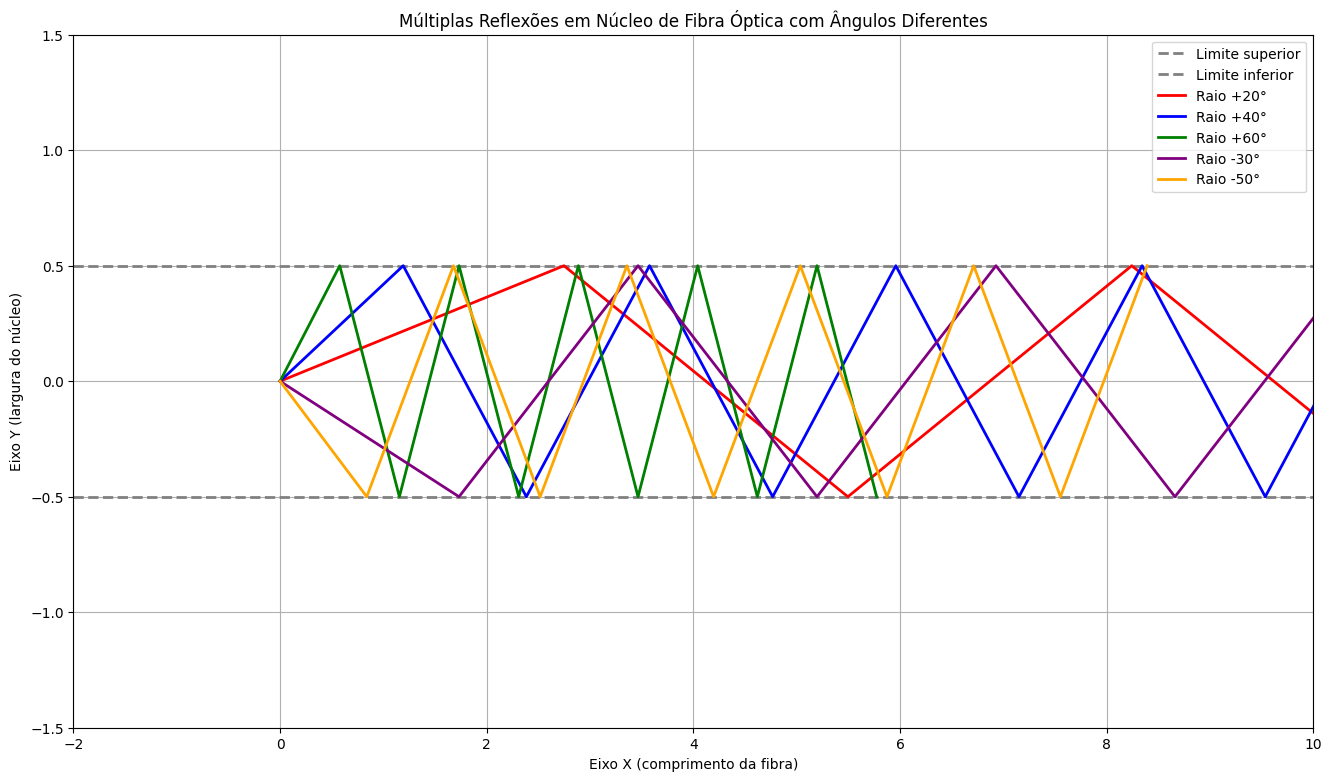

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
largura_fibra = 1.0  # Largura do núcleo da fibra
numero_reflexoes = 10  # Número de reflexões por raio
angulos_graus = [20, 40, 60, -30, -50]  # Ângulos de incidência variados (graus)
cores = ['red', 'blue', 'green', 'purple', 'orange']

# Função para calcular e plotar o trajeto de um raio
def plotar_raio(angulo_graus, cor, label):
    angulo_rad = np.radians(abs(angulo_graus))
    comprimento_passo = largura_fibra / np.tan(angulo_rad)
    
    x0, y0 = 0, 0
    x_points = [x0]
    y_points = [y0]
    
    # Define sentido inicial de subida ou descida
    sentido = 1 if angulo_graus > 0 else -1
    
    for _ in range(numero_reflexoes):
        x1 = x_points[-1] + comprimento_passo
        y1 = largura_fibra / 2 * sentido
        x_points.append(x1)
        y_points.append(y1)
        sentido *= -1  # Inverte o sentido da reflexão

    plt.plot(x_points, y_points, color=cor, linewidth=2, label=label)

# Plotagem
plt.figure(figsize=(16, 9))

# Núcleo da fibra (limites superior e inferior)
plt.axhline(y=largura_fibra / 2, color='gray', linestyle='--', linewidth=2, label='Limite superior')
plt.axhline(y=-largura_fibra / 2, color='gray', linestyle='--', linewidth=2, label='Limite inferior')

# Plotando todos os raios
for angulo, cor in zip(angulos_graus, cores):
    plotar_raio(angulo, cor, f'Raio {angulo:+}°')

# Estética
plt.title('Múltiplas Reflexões em Núcleo de Fibra Óptica com Ângulos Diferentes')
plt.xlabel('Eixo X (comprimento da fibra)')
plt.ylabel('Eixo Y (largura do núcleo)')
plt.xlim(-2, 10)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()
